In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import  KMeans

import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv('accidents.csv', parse_dates=['date'])


In [3]:
#corrections coordonnées antilles inversées
idx = df['lat'] < -61
df.loc[idx, ['lat','long']] = df.loc[idx, ['long','lat']].values

In [4]:
coords=df[['lat','long']]

In [5]:
scores = []

for k in np.arange(10,100) :
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(coords)
    
    scores.append(kmeans.score(coords))


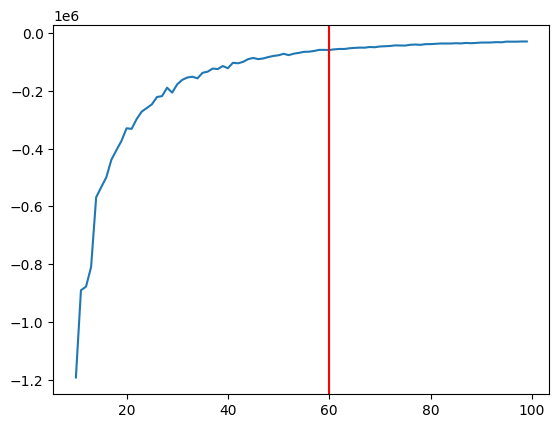

In [6]:
import matplotlib.pyplot as plt
plt.plot(np.arange(10,100), scores)
plt.axvline(60, color='r')

In [7]:
kmeans = KMeans(n_clusters = 60)
coords['cluster'] = kmeans.fit_predict(coords)

centers = kmeans.cluster_centers_
labels = kmeans.labels_




c:\temp\eric.favre\temp\ipykernel_15028\1992880335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  coords['cluster'] = kmeans.fit_predict(coords)


In [8]:
import folium

In [9]:
map = folium.Map(location=[0,0], zoom_start=1)

In [10]:
for p in centers :
    folium.Marker(p, popup='Point', tooltip  = f"{p[0]} - {p[1]}").add_to(map)

In [11]:
map.save("centroids.html")

In [12]:
map